In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('/content/labeled_data.csv')
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['offensive_language'].plot(kind='hist', bins=20, title='offensive_language')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['neither'].plot(kind='hist', bins=20, title='neither')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Unnamed: 0', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='count', y='offensive_language', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='offensive_language', y='neither', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='neither', y='class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['offensive_language']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('offensive_language')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['neither']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('neither')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['class']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('class')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('tweet')):
  _plot_series(series, series_name, i)
  fig.legend(title='tweet', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['offensive_language'].plot(kind='line', figsize=(8, 4), title='offensive_language')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['neither'].plot(kind='line', figsize=(8, 4), title='neither')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Unnamed: 0', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='count', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='offensive_language', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['tweet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='neither', y='tweet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

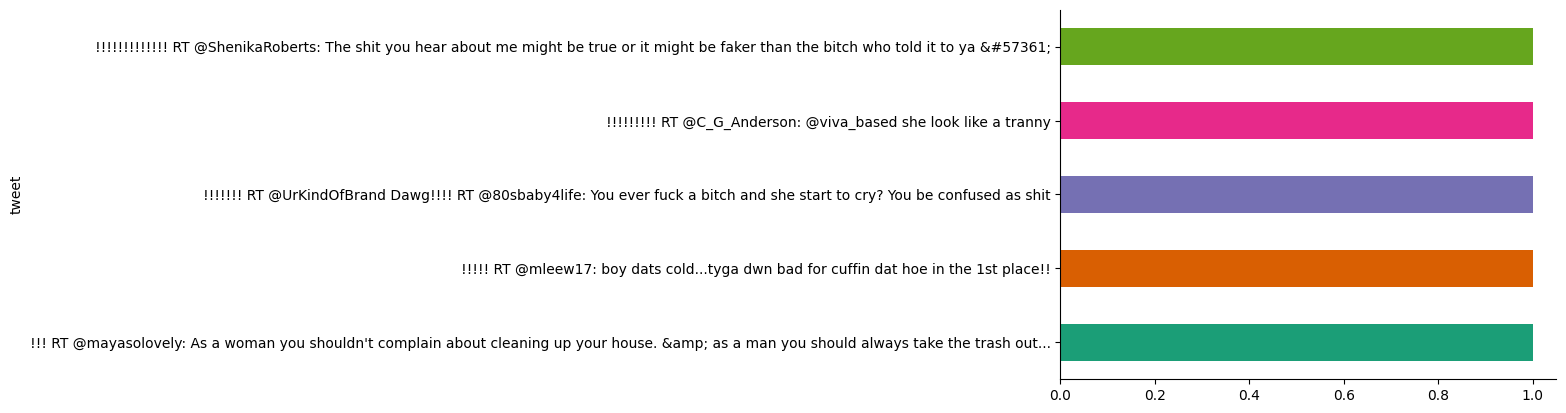

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

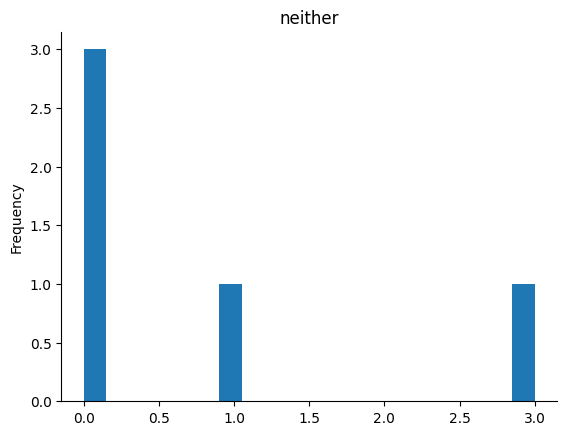

In [6]:
from matplotlib import pyplot as plt
_df_3['neither'].plot(kind='hist', bins=20, title='neither')
plt.gca().spines[['top', 'right',]].set_visible(False)

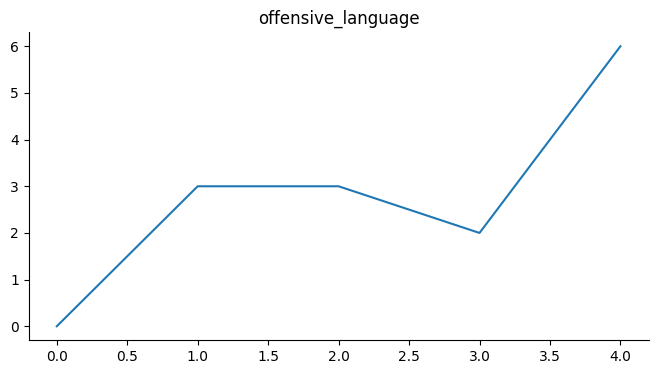

In [5]:
from matplotlib import pyplot as plt
_df_15['offensive_language'].plot(kind='line', figsize=(8, 4), title='offensive_language')
plt.gca().spines[['top', 'right']].set_visible(False)

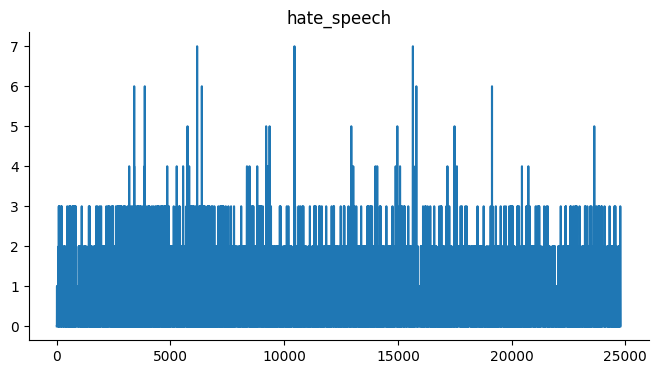

In [4]:
# @title hate_speech

from matplotlib import pyplot as plt
df['hate_speech'].plot(kind='line', figsize=(8, 4), title='hate_speech')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
df.shape


(24783, 7)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


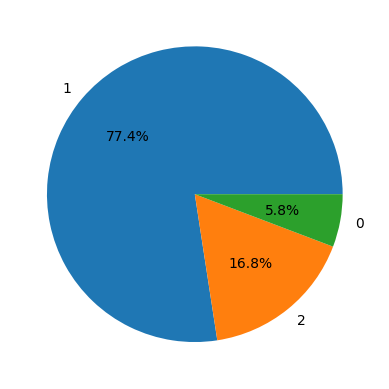

In [10]:
plt.pie(df['class'].value_counts().values,
		labels = df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [11]:
# Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


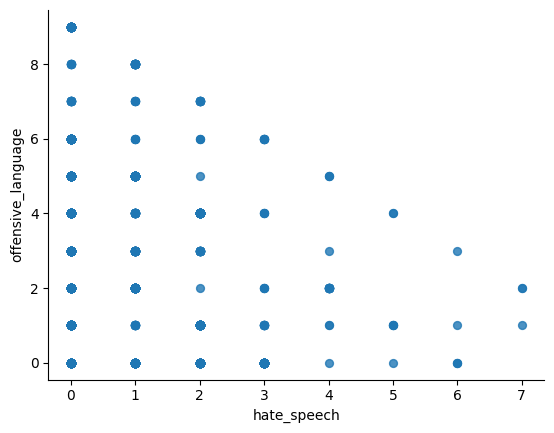

In [12]:
# @title hate_speech vs offensive_language

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hate_speech', y='offensive_language', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():

		if word not in stop_words:

			# Let's Lemmatize the word as well
			# before appending to the imp_words list.

			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


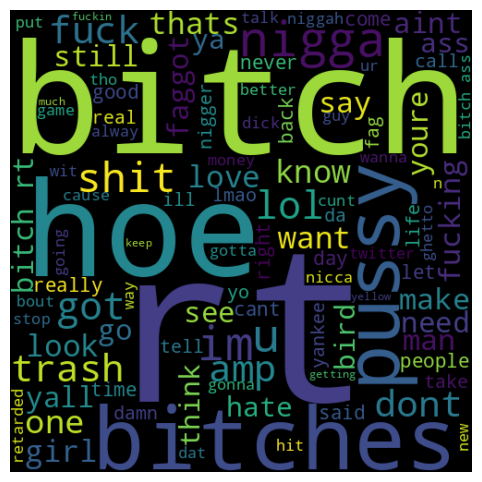

In [15]:
# frequent words present in the corpus of the data.

import matplotlib.pyplot as plt
# @title frequent words

plt.figure(figsize=(10, 6))
wc = WordCloud(max_words=100, width=500, height=500).generate(" ".join(df['tweet'].values))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


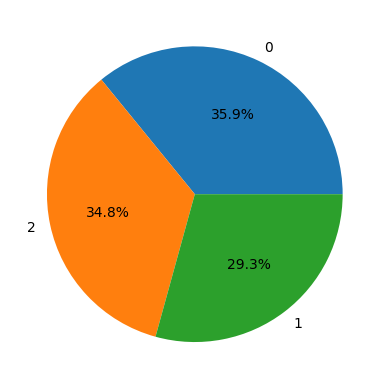

In [17]:
plt.pie(balanced_df['class'].value_counts().values,
		labels=balanced_df['class'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [18]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
X_train.shape, X_val.shape


((9562,), (2391,))

In [19]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape


((9562, 3), (2391, 3))

In [20]:
max_words = 5000
max_len = 100

token = Tokenizer(num_words=max_words,
				lower=True,
				split=' ')

token.fit_on_texts(X_train)


In [22]:
# prompt:  training the tokenizer
# and Generating token embeddings

X_train_seq = token.texts_to_sequences(X_train)
X_val_seq = token.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq,
							maxlen=max_len,
							padding='post')

X_val_pad = pad_sequences(X_val_seq,
							maxlen=max_len,
							padding='post')


In [23]:
#  implement a Sequential model which will contain the following parts:
# Three Embedding Layers to learn a featured vector representations of the input vectors.
# A Bidirectional LSTM layer to identify useful patterns in the sequence.
# Then we will have one fully connected layer.
# We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 128, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

history = model.fit(
    X_train_pad, Y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_val_pad, Y_val),
    verbose=1
)


Epoch 1/5
299/299 [==============================] - 48s 145ms/step - loss: 1.0959 - accuracy: 0.3510 - val_loss: 1.0969 - val_accuracy: 0.3346
Epoch 2/5
299/299 [==============================] - 42s 142ms/step - loss: 1.0954 - accuracy: 0.3508 - val_loss: 1.1033 - val_accuracy: 0.3346
Epoch 3/5
299/299 [==============================] - 43s 143ms/step - loss: 1.0956 - accuracy: 0.3543 - val_loss: 1.1330 - val_accuracy: 0.3346
Epoch 4/5
299/299 [==============================] - 43s 143ms/step - loss: 1.0956 - accuracy: 0.3510 - val_loss: 1.1112 - val_accuracy: 0.2890
Epoch 5/5
299/299 [==============================] - 42s 142ms/step - loss: 1.0958 - accuracy: 0.3457 - val_loss: 1.0935 - val_accuracy: 0.3764


In [24]:
model = keras.models.Sequential([
	layers.Embedding(max_words, 32, input_length=max_len),
	layers.Bidirectional(layers.LSTM(16)),
	layers.Dense(512, activation='relu', kernel_regularizer='l1'),
	layers.BatchNormalization(),
	layers.Dropout(0.3),
	layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 32)                6272      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 512)               16896     
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                

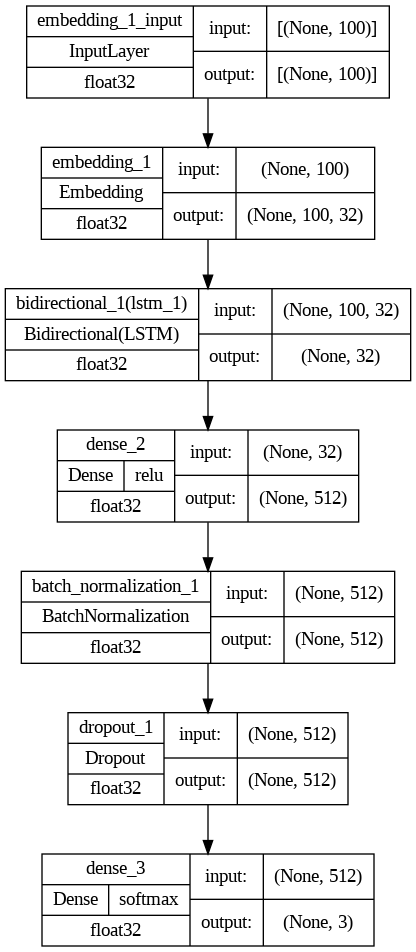

In [26]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


In [29]:
# prompt:  train the model.

history = model.fit(
	X_train_pad,
	Y_train,
	epochs=5,
	batch_size=32,
	validation_data=(X_val_pad, Y_val),
	callbacks=[es, lr],
	verbose=1
)


Epoch 1/5
299/299 [==============================] - 26s 79ms/step - loss: 2.1610 - accuracy: 0.3422 - val_loss: 1.1153 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 2/5
299/299 [==============================] - 20s 68ms/step - loss: 1.1167 - accuracy: 0.3531 - val_loss: 1.1149 - val_accuracy: 0.3764 - lr: 0.0010
Epoch 3/5
299/299 [==============================] - 22s 75ms/step - loss: 1.1162 - accuracy: 0.3528 - val_loss: 1.1141 - val_accuracy: 0.3764 - lr: 0.0010
Epoch 4/5
299/299 [==============================] - 20s 67ms/step - loss: 1.1162 - accuracy: 0.3504 - val_loss: 1.1153 - val_accuracy: 0.3346 - lr: 0.0010
Epoch 5/5
299/299 [==============================] - 23s 78ms/step - loss: 1.1163 - accuracy: 0.3498 - val_loss: 1.1153 - val_accuracy: 0.3346 - lr: 0.0010


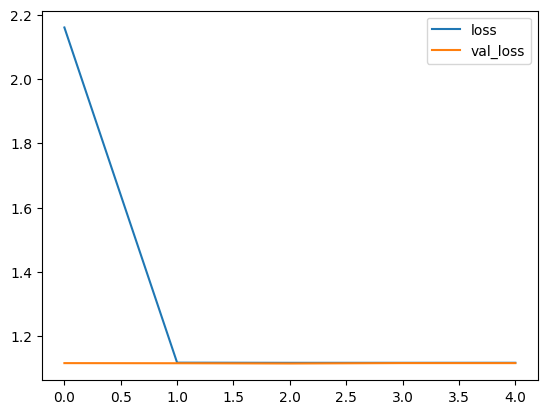

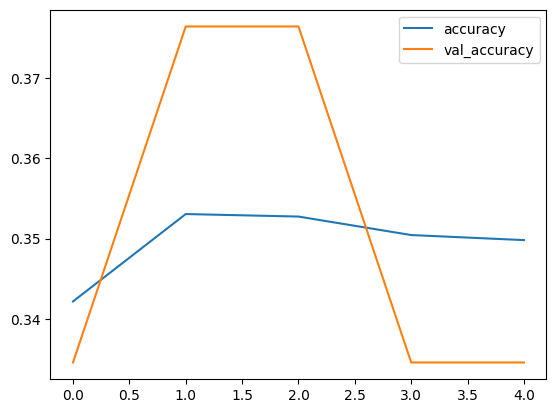

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


In [31]:
#  train the model.

history = model.fit(
	X_train_pad,
	Y_train,
	epochs=20,
	batch_size=32,
	validation_data=(X_val_pad, Y_val),
	callbacks=[es, lr],
	verbose=1
)


Epoch 1/20
299/299 [==============================] - 22s 74ms/step - loss: 1.1058 - accuracy: 0.3488 - val_loss: 1.1049 - val_accuracy: 0.3346 - lr: 5.0000e-04
Epoch 2/20
299/299 [==============================] - 22s 73ms/step - loss: 1.1053 - accuracy: 0.3514 - val_loss: 1.1044 - val_accuracy: 0.3346 - lr: 5.0000e-04
Epoch 3/20
299/299 [==============================] - 23s 76ms/step - loss: 1.1052 - accuracy: 0.3547 - val_loss: 1.1029 - val_accuracy: 0.3764 - lr: 5.0000e-04
Epoch 4/20
299/299 [==============================] - 21s 69ms/step - loss: 1.1053 - accuracy: 0.3510 - val_loss: 1.1029 - val_accuracy: 0.3764 - lr: 5.0000e-04
Epoch 5/20
299/299 [==============================] - 23s 78ms/step - loss: 1.1052 - accuracy: 0.3484 - val_loss: 1.1040 - val_accuracy: 0.3346 - lr: 5.0000e-04
Epoch 6/20
299/299 [==============================] - 21s 69ms/step - loss: 1.1003 - accuracy: 0.3540 - val_loss: 1.0995 - val_accuracy: 0.3346 - lr: 2.5000e-04


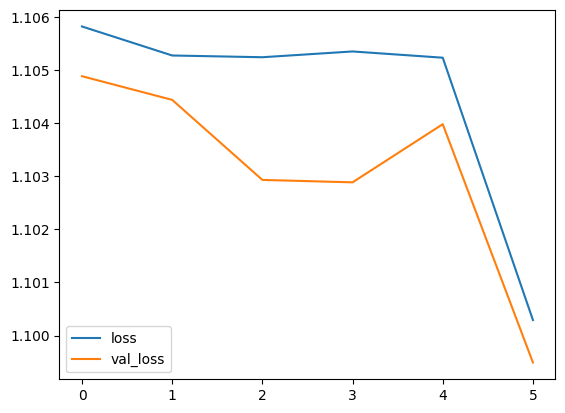

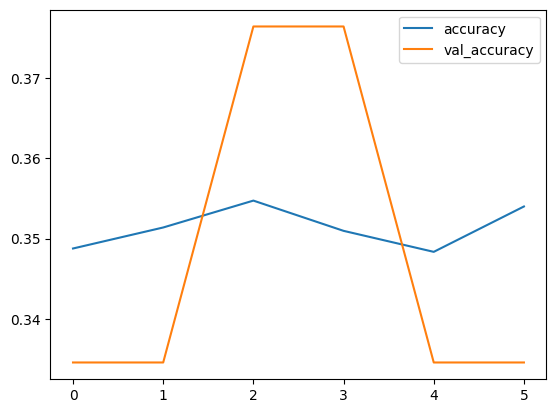

In [32]:
#plot the graph loss, accuracy validation

import pandas as pd
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
